### Bennett Slibeck
### Final Project:
## The End Triassic Extinciton and the Fate of the Dinosaurs

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr

This project is guided by a single research question: 

Was the explosion in dinosaurian diversity at the end of the Triassic accompanied by contemporaneous drops in diversity losses within other tetrapod communities, or was it instead a response to the lack of diversity within terrestrial ecosystems?

To answer this question, I will be using data from the paleobiology database, a publically accessible and constantly updated repository of paleontological data. The databse can be accessed here:

www.paleobiodb.org

First, I have to seperate out the data useful for this project.

To answer my quesiton, I only need data from the late Triassic period, as well as the very earliest Jurassic Fossils. The late Triassic covers the majority of the Triassic, extending from 237 to 201.3 million years ago. The early Jurassic extends from 201.3 to 174 million years ago. This may be a little too broad temporally to answer our questions effectively, but we can trim the dataset later.


In [2]:
'''
NO LONGER RELEVANT

url = 'https://paleobiodb.org/data1.2/specs/list.csv?datainfo&rowcount&taxon_reso=lump_genus&idqual=certain&max_ma=237&min_ma=173.4&envtype=terr,terrother&show=acconly'
I was having trouble downloading the data into the notebook from this link, but it is stable and links to a download file. I have uploaded the file to Zenodo as well, and will use that link for the rest of the project
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5765499.svg)](https://doi.org/10.5281/zenodo.5765499)

'''

"\nNO LONGER RELEVANT\n\nurl = 'https://paleobiodb.org/data1.2/specs/list.csv?datainfo&rowcount&taxon_reso=lump_genus&idqual=certain&max_ma=237&min_ma=173.4&envtype=terr,terrother&show=acconly'\nI was having trouble downloading the data into the notebook from this link, but it is stable and links to a download file. I have uploaded the file to Zenodo as well, and will use that link for the rest of the project\n[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5765499.svg)](https://doi.org/10.5281/zenodo.5765499)\n\n"

The paleodb data request link is lsited below. New data may be added and old data revised in the future, but this should work. The Zenodo link is for a previous version of the dataset that did not include enough taxonomic information to be mechanically iterable

## Data Preperation

In [3]:

url = 'https://paleobiodb.org/data1.2/occs/list.csv?datainfo&rowcount&max_ma=237&min_ma=174&envtype=terr&show=class,classext,subgenus,acconly,img,abund,ecospace,taphonomy,coords,paleoloc,strat,env,geo,timebins'
df = pd.read_csv(url, header = [19], index_col=[0])
df.head()


,record_type,reid_no,flags,collection_no,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,...,paleolng,paleolat,geoplate,formation,stratgroup,member,environment,tectonic_setting,geology_comments,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
128932,occ,NaN,NaN,10642,Neocalamites,genus,288242.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian
128933,occ,NaN,NaN,10642,Brachyphyllum comancheanum,species,404536.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian
128934,occ,NaN,NaN,10642,Masculostrobus lafonii,species,404537.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian
128935,occ,NaN,NaN,10642,Alostrobus traversei,species,404539.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian
128936,occ,NaN,NaN,10642,Pityoidolepis colbertii,species,404542.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian


In [4]:
print(df.columns)

Index(['record_type', 'reid_no', 'flags', 'collection_no', 'accepted_name',
       'accepted_rank', 'accepted_no', 'early_interval', 'late_interval',
       'max_ma', 'min_ma', 'reference_no', 'phylum', 'phylum_no', 'class',
       'class_no', 'order', 'order_no', 'family', 'family_no', 'genus',
       'genus_no', 'subgenus_no', 'image_no', 'abund_value', 'abund_unit',
       'taxon_environment', 'environment_basis', 'motility', 'life_habit',
       'vision', 'diet', 'reproduction', 'ontogeny', 'ecospace_comments',
       'composition', 'architecture', 'thickness', 'reinforcement', 'lng',
       'lat', 'paleomodel', 'paleolng', 'paleolat', 'geoplate', 'formation',
       'stratgroup', 'member', 'environment', 'tectonic_setting',
       'geology_comments', 'time_bins'],
      dtype='object')


First, we should examine the phylum listing and remove plants and invertebrates because they are not relevant to answering our question

In [5]:
df.phylum.unique()

array(['Sphenophyta', 'Pinophyta', 'Coniferophyta', 'NO_PHYLUM_SPECIFIED',
       'Gymnospermophyta', 'Chordata', nan, 'Mollusca', 'Arthropoda',
       'Bryophyta', 'Pteridophyta', 'Cycadophyta', 'Peltaspermophyta',
       'Pteridospermophyta', 'Ginkgophyta', 'Tracheophyta', 'Gnetophyta',
       'Cycadeoideophyta', 'Angiospermae', 'Filicophyta', 'Lycophyta',
       'Ochrophyta', 'Lycopodophyta', 'Annelida', 'Charophyta',
       'Chlorophyta', 'Radiolaria', 'Magnoliophyta', 'Brachiopoda',
       'Echinodermata'], dtype=object)

All the animals relevant to us are Chordates, so this step will be easier. 

In [6]:
df = df[df.phylum == 'Chordata']
df

,record_type,reid_no,flags,collection_no,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,...,paleolng,paleolat,geoplate,formation,stratgroup,member,environment,tectonic_setting,geology_comments,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
138845,occ,NaN,NaN,11805,Morganucodon oehleri,species,203398.0,Hettangian,NaN,201.3,...,120.20,37.81,611,Lufeng,NaN,Shawan,terrestrial indet.,NaN,First fossiliferrous beds occur 200 m abovebas...,Hettangian
139295,occ,25241.0,NaN,11920,Theropoda,unranked clade,38513.0,Hettangian,Sinemurian,201.3,...,-9.08,21.08,101,Portland,Agawam,NaN,terrestrial indet.,rift,NaN,Sinemurian
139306,occ,NaN,NaN,11923,Amygdalodon patagonicus,species,66447.0,Pliensbachian,Early Toarcian,190.8,...,NaN,NaN,coordinates not computable using this model,Cerro Carnerero,NaN,NaN,terrestrial indet.,NaN,NaN,Pliensbachian
146084,occ,NaN,NaN,12856,Icarosaurus siefkeri,species,156159.0,Norian,NaN,228.0,...,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,lacustrine - large,rift,NaN,Norian
146085,occ,NaN,NaN,12856,Rutiodon carolinensis,species,64947.0,Norian,NaN,228.0,...,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,lacustrine - large,rift,NaN,Norian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583303,occ,NaN,I,223718,Grallator,genus,64079.0,Early Hettangian,NaN,201.3,...,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,"""floodplain""",NaN,"""a vast floodplain in which fluvial channels p...",Sinemurian
1583754,occ,NaN,IF,55527,Anomoepus crassus,species,67426.0,Hettangian,NaN,201.3,...,-10.57,18.49,101,Towaco,Meriden,B,lacustrine indet.,rift,NaN,Hettangian
1583756,occ,NaN,IF,187197,Anchisauripus,genus,64083.0,Hettangian,NaN,201.3,...,-10.57,18.49,101,Towaco,Meriden,B,lacustrine indet.,rift,NaN,Hettangian


Next we should confine our search to terrestrial animals

In [7]:
df.taxon_environment.unique()

array(['terrestrial', 'marine', 'brackish,freshwater,terrestrial',
       'freshwater', 'freshwater,terrestrial'], dtype=object)

We  can exclude mixed aquatic species like those with multiple environmental lsitings since their extinction was not due to dinosaurian replacement

In [8]:
df = df[df.taxon_environment == 'terrestrial']
df

,record_type,reid_no,flags,collection_no,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,...,paleolng,paleolat,geoplate,formation,stratgroup,member,environment,tectonic_setting,geology_comments,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
138845,occ,NaN,NaN,11805,Morganucodon oehleri,species,203398.0,Hettangian,NaN,201.3,...,120.20,37.81,611,Lufeng,NaN,Shawan,terrestrial indet.,NaN,First fossiliferrous beds occur 200 m abovebas...,Hettangian
139295,occ,25241.0,NaN,11920,Theropoda,unranked clade,38513.0,Hettangian,Sinemurian,201.3,...,-9.08,21.08,101,Portland,Agawam,NaN,terrestrial indet.,rift,NaN,Sinemurian
139306,occ,NaN,NaN,11923,Amygdalodon patagonicus,species,66447.0,Pliensbachian,Early Toarcian,190.8,...,NaN,NaN,coordinates not computable using this model,Cerro Carnerero,NaN,NaN,terrestrial indet.,NaN,NaN,Pliensbachian
146084,occ,NaN,NaN,12856,Icarosaurus siefkeri,species,156159.0,Norian,NaN,228.0,...,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,lacustrine - large,rift,NaN,Norian
146085,occ,NaN,NaN,12856,Rutiodon carolinensis,species,64947.0,Norian,NaN,228.0,...,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,lacustrine - large,rift,NaN,Norian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583303,occ,NaN,I,223718,Grallator,genus,64079.0,Early Hettangian,NaN,201.3,...,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,"""floodplain""",NaN,"""a vast floodplain in which fluvial channels p...",Sinemurian
1583754,occ,NaN,IF,55527,Anomoepus crassus,species,67426.0,Hettangian,NaN,201.3,...,-10.57,18.49,101,Towaco,Meriden,B,lacustrine indet.,rift,NaN,Hettangian
1583756,occ,NaN,IF,187197,Anchisauripus,genus,64083.0,Hettangian,NaN,201.3,...,-10.57,18.49,101,Towaco,Meriden,B,lacustrine indet.,rift,NaN,Hettangian


Acknowledging that the fossil record is incomplete, first we will look at species diversity, rather than individual counts, to try and answer the question. Before this however, this is a good point to finish cleaning the dataset by removing columns irrelevant for this study.

In [9]:
df = df.drop(columns = ['record_type', 'reid_no', 'flags', 'collection_no', 'accepted_no', 'early_interval', 'late_interval', 'reference_no', 'class_no', 'order_no',
                         'genus_no', 'subgenus_no', 'image_no', 'taxon_environment', 'environment_basis','vision', 'reproduction', 'ontogeny', 'ecospace_comments',
                        'composition', 'architecture', 'thickness', 'reinforcement',  'environment', 'tectonic_setting','geology_comments', 'phylum', 'phylum_no'] )

In [10]:
df

,accepted_name,accepted_rank,max_ma,min_ma,class,order,family,family_no,genus,abund_value,...,lng,lat,paleomodel,paleolng,paleolat,geoplate,formation,stratgroup,member,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
138845,Morganucodon oehleri,species,201.3,199.3,Osteichthyes,Morganucodonta,Morganucodontidae,39748,Morganucodon,2.0,...,102.107323,25.172689,gp_mid,120.20,37.81,611,Lufeng,NaN,Shawan,Hettangian
139295,Theropoda,unranked clade,201.3,190.8,Saurischia,NaN,NaN,NaN,NaN,1.0,...,-72.633331,41.566666,gp_mid,-9.08,21.08,101,Portland,Agawam,NaN,Sinemurian
139306,Amygdalodon patagonicus,species,190.8,182.0,Saurischia,NO_ORDER_SPECIFIED,NO_FAMILY_SPECIFIED,NF,Amygdalodon,1.0,...,-69.516670,-43.966667,gp_mid,NaN,NaN,coordinates not computable using this model,Cerro Carnerero,NaN,NaN,Pliensbachian
146084,Icarosaurus siefkeri,species,228.0,208.5,Reptilia,Eosuchia,Kuehneosauridae,37838,Icarosaurus,1.0,...,-74.018608,40.811943,gp_mid,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,Norian
146085,Rutiodon carolinensis,species,228.0,208.5,Reptilia,NO_ORDER_SPECIFIED,Parasuchidae,133090,Rutiodon,1.0,...,-74.018608,40.811943,gp_mid,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,Norian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583303,Grallator,genus,201.3,196.5,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Grallator,NaN,...,2.700000,44.478001,gp_mid,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,Sinemurian
1583754,Anomoepus crassus,species,201.3,199.3,Ornithischia,NO_ORDER_SPECIFIED,Moyenisauropodidae,131256,Anomoepus,NaN,...,-74.325836,40.815277,gp_mid,-10.57,18.49,101,Towaco,Meriden,B,Hettangian
1583756,Anchisauripus,genus,201.3,199.3,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Anchisauripus,NaN,...,-74.325836,40.815277,gp_mid,-10.57,18.49,101,Towaco,Meriden,B,Hettangian


In order to make sure diversirty counts take place on a level playing field, we need to pare down the data by removing entries for any group larger than a genera. For the first pass analyzing the data, we will measure diversity by genera.

In [11]:
df.accepted_rank.unique()

array(['species', 'unranked clade', 'genus', 'family', 'order',
       'suborder', 'infraorder', 'subfamily', 'class', 'superorder',
       'superfamily', 'subclass', 'subgenus', 'informal'], dtype=object)

In [12]:
gen = df[df.accepted_rank=='genus']

In [13]:
gen

,accepted_name,accepted_rank,max_ma,min_ma,class,order,family,family_no,genus,abund_value,...,lng,lat,paleomodel,paleolng,paleolat,geoplate,formation,stratgroup,member,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
149239,Diphydontosaurus,genus,208.5,201.3,Reptilia,Rhynchocephalia,NO_FAMILY_SPECIFIED,NF,Diphydontosaurus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
149241,Diphydontosaurus,genus,208.5,201.3,Reptilia,Rhynchocephalia,NO_FAMILY_SPECIFIED,NF,Diphydontosaurus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
149242,Terrestrisuchus,genus,208.5,201.3,Reptilia,Loricata,NO_FAMILY_SPECIFIED,NF,Terrestrisuchus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
149246,Kuehneosaurus,genus,208.5,201.3,Reptilia,Eosuchia,Kuehneosauridae,37838,Kuehneosaurus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
149250,Terrestrisuchus,genus,208.5,201.3,Reptilia,Loricata,NO_FAMILY_SPECIFIED,NF,Terrestrisuchus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583295,Grallator,genus,201.3,196.5,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Grallator,NaN,...,2.716000,44.453999,gp_mid,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,Sinemurian
1583297,Eubrontes,genus,201.3,196.5,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Eubrontes,NaN,...,2.716000,44.453999,gp_mid,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,Sinemurian
1583302,Eubrontes,genus,201.3,196.5,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Eubrontes,NaN,...,2.700000,44.478001,gp_mid,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,Sinemurian


### Initial Analysis - Genera Diversity across the boundary

One way to analyze diversity is to look at extinction counts. To do so, we will look take the last occurence of a species, and use it as a proxy for extiction. I hypothesize we will see a sharp uptake in extincitons right at 201 million years ago.

In [14]:
gen.min_ma.unique()

array([201.3, 190.8, 208.5, 228. , 212. , 182.7, 199.3, 174.1, 168.4,
       196.5, 183. , 221.5, 168.3, 170.3, 205.6])

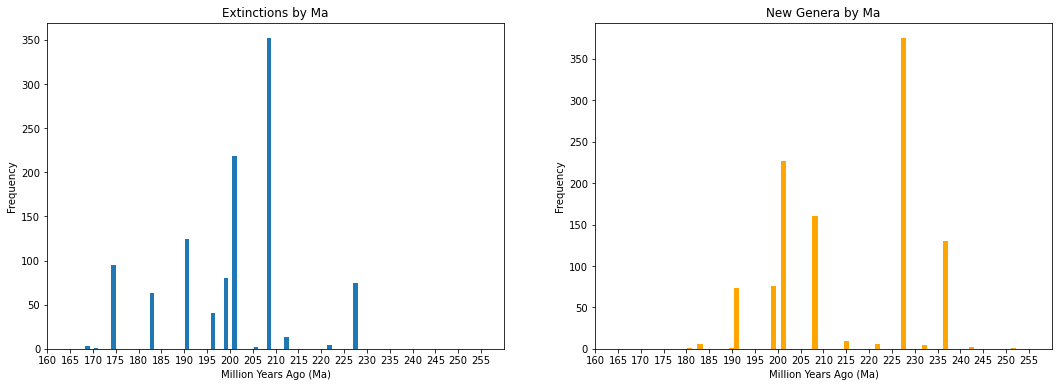

In [15]:
fig, axes = plt.subplots(figsize = (18,6), ncols = 2)
ax0 , ax1 = axes
ax0= gen.min_ma.plot(ax= ax0, kind = 'hist', title = 'Extinctions by Ma', xlabel = 'Million Years Ago (Ma)', bins = (237-174))
ax0.set_xlabel('Million Years Ago (Ma)')
ax0.set_xlim(160, 260)
ax0.set_xticks(range(160, 260, 5))
ax1 = gen.max_ma.plot(kind = 'hist', title = 'New Genera by Ma', xlabel = 'Million Years Ago (Ma)', bins = (237-174), color = 'orange')
ax1.set_xlabel('Million Years Ago (Ma)')
ax1.set_xlim(160, 260)
ax1.set_xticks(range(160, 260, 5));

### Notes: A few signals pop out quite clearly here. Most notably, the loss of a vast number of species before the ETE, which takes place at 201Ma. The apparent mass extinction at ~208Ma comes with the end of the Norian Period. While the massive increase in diversity at around 227 is its start. 

#### This reveals a flaw in experiment design:
#### In the absence of catastrophic changes, it is hard to tell when a species goes extinct. Those genera not alive before or after the Norian but abundant during the middle are thus given a maximum possible genera lifespan bounded by the two ends of the period


#### With that being said, It is work taking a look at the Norian Biota to see what groups were abundant

In [16]:
norian = gen[gen.time_bins == 'Norian']
norian['class'].describe()

# There is a single mammal genera in the dataset, since they are outside the scope of this project, we will ignore it

norian = norian.drop(index = 778597)

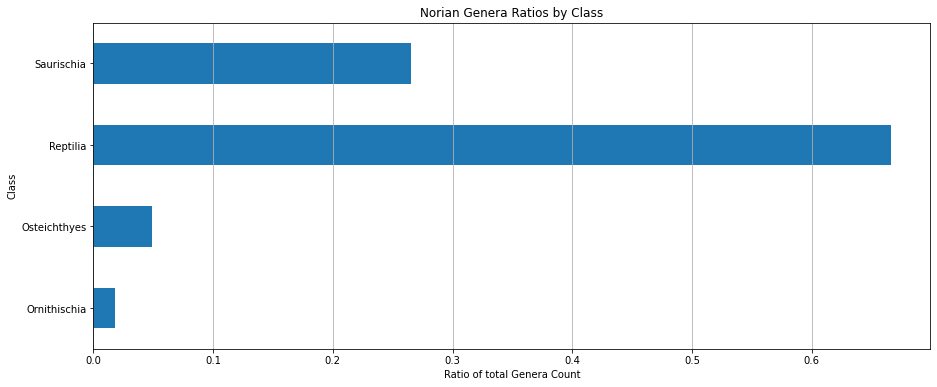

In [17]:
fig = (norian.groupby('class').accepted_name.count() / 452).plot(kind = 'barh', title = 'Norian Genera Ratios by Class', 
                                                           xlabel = 'Class', figsize = (15, 6))
fig.set_xlabel('Ratio of total Genera Count')
fig.grid(which='major', axis = 'x')

#### Notes: while saurischian and ornithscian dinosaurs had both begun to arrive on the scene, the ecosystems of the Norian were dominated by reptiles. Crocodile like Rausiuchain species filled nearly every ecological niche. But how does this change over time? First, Let's compare the Carnian, Rhaetian, and the Norian. The three Ages of the Triassic:


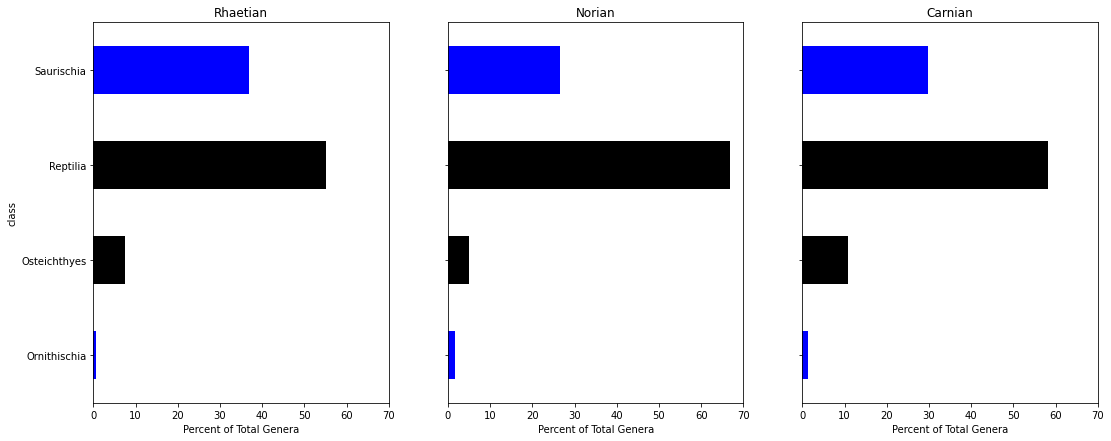

In [28]:
rhaetian = gen[gen.time_bins == 'Rhaetian']
carnian = gen[gen.time_bins=='Carnian']

nor_rats = norian.groupby('class').accepted_name.count() / norian['class'].count() * 100
rhae_rats = rhaetian.groupby('class').accepted_name.count() / rhaetian['class'].count() * 100
carn_rats = carnian.groupby('class').accepted_name.count()  / carnian['class'].count() * 100

fig , axes = plt.subplots(ncols = 3, figsize = (18, 7))
ax0 , ax1, ax2 = axes
plt.title('Triassic Agewise Genera Distributions Percentages')
ax0.set_xlabel('Percent of Total Genera')
ax1.set_xlabel('Percent of Total Genera')
ax2.set_xlabel('Percent of Total Genera')
rhae_rats.plot(ax=axes[0], kind='barh', stacked = True, title = 'Rhaetian', xlim=(0, 70), color = ['blue', 'black', 'black', 'blue'])
carn_rats.plot(ax = axes[2], kind = 'barh', stacked = True, title = 'Carnian', xlim=(0, 70), color = ['blue', 'black', 'black', 'blue' ],)
nor_rats.plot(ax = axes[1], kind = 'barh', stacked = True, title = 'Norian', xlim=(0, 70), color = ['blue', 'black', 'black', 'blue' ])
ax1.set_yticklabels([])
ax1.set_ylabel('' )
ax2.set_yticklabels([])
ax2.set_ylabel('' );


Notes: The blue sections represent dinosaurian genera, while the black represents all other groups. The general Trend throughout the Triassic is reptialian dominated ecosytems.

Even in the late Triassic, the Rhaetian, the combination of both dinosaur classes does not outweigh the reptilian hold on the ecosystem. Looking at this Trend across the extinction boundary could reveal fruitful information about who went extinct and why.

In [29]:
gen.time_bins.unique()

array(['Rhaetian', 'Sinemurian', 'Norian', 'Carnian', '-', 'Toarcian',
       'Hettangian', 'Pliensbachian'], dtype=object)

''

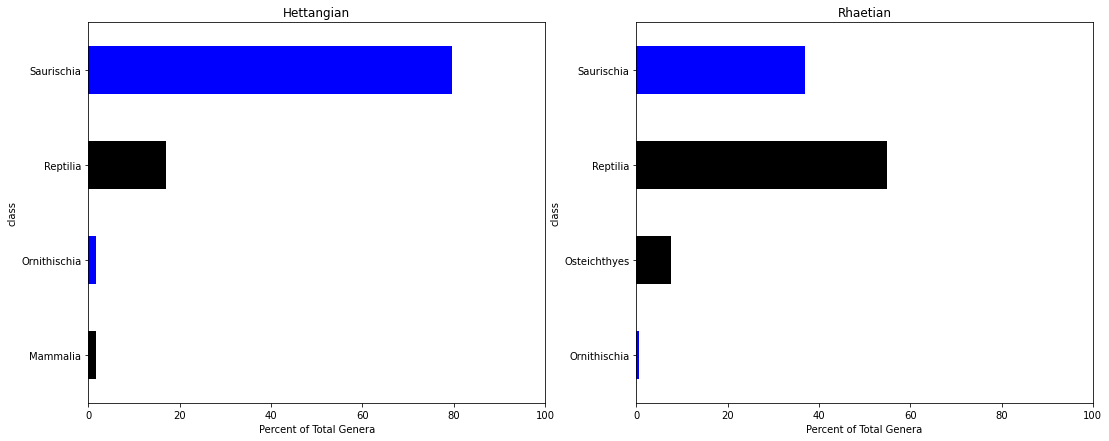

In [41]:
hettangian = gen[gen.time_bins == 'Hettangian']

het_rats = hettangian.groupby('class').accepted_name.count() / hettangian['class'].count() * 100

fig , axes = plt.subplots(ncols = 2, figsize = (18, 7))
ax0 , ax1 = axes
plt.title('Traissic-Jurassic Boundary Classwise Genera Ratios')
ax0.set_xlabel('Percent of Total Genera')
ax1.set_xlabel('Percent of Total Genera')
het_rats.plot(ax=axes[0], kind = 'barh', stacked = True, title = 'Hettangian', xlim=(0,100), color = ['black', 'blue', 'black', 'blue'])
rhae_rats.plot(ax=axes[1], kind='barh', stacked = True, title = 'Rhaetian', xlim=(0, 100), color = ['blue', 'black', 'black', 'blue'])
;

#### Notes: Across the Triassic-Jurassic boundary, in a near immediate shift, Dinosaurs by and large replace the reptilian land fauna. While the ornithiscians are still few in number, the saurisichians, which inlude both the meat eating theropods and the long necked saurpopod dinosaurs become the dominant faunal group, with a higher percentage of total genera than the reptilian fauna had at any point during the Triassic. The near total ecossytem re-wiring is indicative that the age of the Dinosaurs truly begins here at the End Triassic. Also of note is the complete dissapearance of the Osteichthyes, synapsid stem mammals that dominated the Permian and held on through the Triassic. In the shade of towering new dinosaurs, the first mammalians began to truly establish a footing in the Jurassic World. 

## Next Steps:
I need to find a way to better analyze species diversity through time on a continous basis, rahter than soleley as a binned variable. Additionally, I would like to make use of the paleo-latitude and longitude data with cartopy to try and plot genera and species distributions through time on a map of pangea, as dinosaurs are hypothesized to have migrated out of the hhigh latitudes and into the tropics following the faunal release of the End Triassic Mass Extinction.

I suspect the chunkiness of this graph is due to geologic period boundaries. It is clear in either case though that my hypothesis was not correct. While there are an abundance of new genera that spring up at the ETE in the new genera graph, it is not accompanied by even the largest of the extiction zones in the Triassic. Perhaps by looking at number of living genera at any given time the mass extinction will leave a clearer signal. In order to do this, I will need to make a living period range for each genera, since the easiest way I can think of doing this is with xarray, I'll switch the dataframe over to an xarray object.

In [67]:
gxr = gen.to_xarray()

In [68]:
gxr

<xarray.Dataset>
Dimensions:        (occurrence_no: 1071)
Coordinates:
  * occurrence_no  (occurrence_no) int64 149239 149241 ... 1583303 1583756
Data variables: (12/24)
    accepted_name  (occurrence_no) object 'Diphydontosaurus' ... 'Anchisauripus'
    accepted_rank  (occurrence_no) object 'genus' 'genus' ... 'genus' 'genus'
    max_ma         (occurrence_no) float64 208.5 208.5 208.5 ... 201.3 201.3
    min_ma         (occurrence_no) float64 201.3 201.3 201.3 ... 196.5 199.3
    class          (occurrence_no) object 'Reptilia' 'Reptilia' ... 'Saurischia'
    order          (occurrence_no) object 'Rhynchocephalia' ... 'NO_ORDER_SPE...
    ...             ...
    paleolat       (occurrence_no) float64 34.38 34.38 34.38 ... nan nan 18.49
    geoplate       (occurrence_no) object '315' '315' ... '101'
    formation      (occurrence_no) object nan nan ... 'Towaco'
    stratgroup     (occurrence_no) object nan nan nan nan ... nan nan 'Meriden'
    member         (occurrence_no) object nan nan nan nan ... nan nan nan 'B'
    time_bins      (occurrence_no) object 'Rhaetian' 'Rhaetian' ... 'Hettangian'

In [104]:
gxr['years_live']=gxr.map(np.arange, (gxr.max_ma, gxr.min_ma, -1))

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [99]:
gxr['span']

<xarray.DataArray 'span' (occurrence_no: 1071)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * occurrence_no  (occurrence_no) int64 149239 149241 ... 1583303 1583756

In [100]:
for val in gxr.span:
    gxr.span[val] = pd.RangeIndex(gxr.max_ma[val], gxr.min_ma[val], -1)

TypeError: invalid indexer array, does not have integer dtype: array(0.)

This was giving me a lot of trouble. Moving on for a bit we can look at the same thing by using time bins

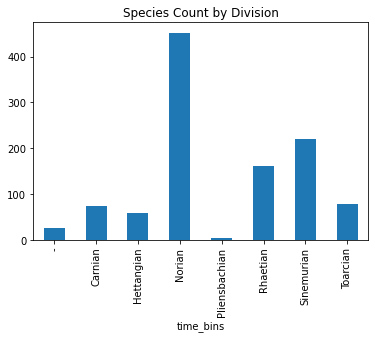

In [132]:


fig = gen.groupby('time_bins').accepted_name.count().plot(kind = 'bar', title = 'Species Count by Division' )


In [139]:
count_by_bin = gen.groupby('time_bins').accepted_name.count()
count_by_bin

time_bins
-                 25
Carnian           74
Hettangian        59
Norian           452
Pliensbachian      3
Rhaetian         160
Sinemurian       220
Toarcian          78
Name: accepted_name, dtype: int64

In [ ]:
thanks!